<a href="https://colab.research.google.com/github/saadspark/Machine-Learning/blob/main/logistic_regression_gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
file_path = '/content/drive/MyDrive/Mechine_Learning_DataSets/gender_classification.csv'
df = pd.read_csv(file_path)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


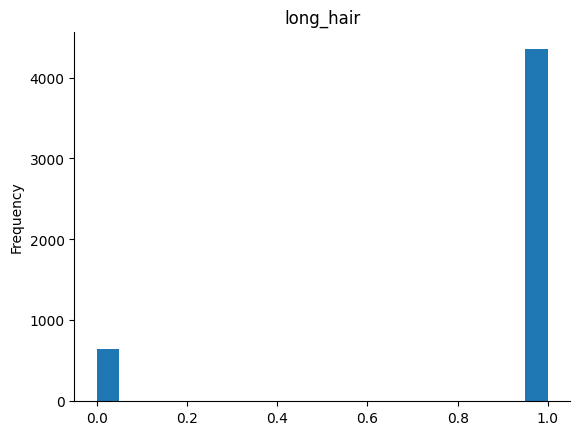

In [9]:
# @title long_hair

from matplotlib import pyplot as plt
df['long_hair'].plot(kind='hist', bins=20, title='long_hair')
plt.gca().spines[['top', 'right',]].set_visible(False)

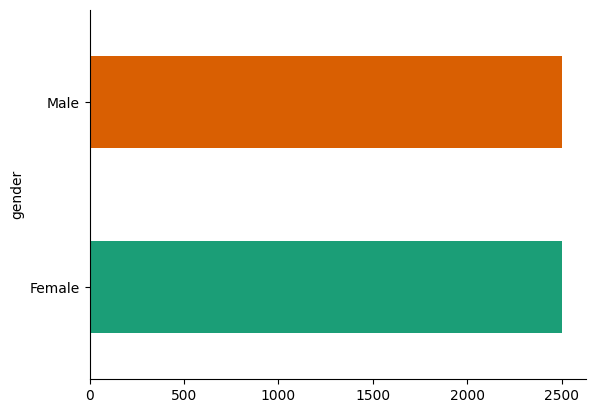

In [8]:
# @title gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
display(df.isna().sum())

,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('gender', axis=1)
y = df['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
model.score(X_test, y_test)

0.9600399600399601

In [38]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(X_test)})
display(comparison_df.head())

,Actual,Predicted
1501,1,1
2586,0,0
2653,0,0
1055,1,1
705,1,1
